In [ ]:
#########################
#####  8 ACTIONS  #######
#########################

In [1]:
import numpy as np

def homing_nn_q4_8(n_trials,learning_rate,eps,gamma):

    # Solving homing task with on-policy TD (SARSA)

    n_steps = 50

    ## Definition of the environment
    N = 7                               #height of the gridworld ---> number of rows
    M = 7                               #length of the gridworld ---> number of columns
    N_states = N * M                     #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 8                                          #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,-1,0,+1,+1,+1,0,-1])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,+1,+1,0,-1,-1,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([1, 1])                                  #terminal state--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Parameters of the model
    #gamma = 0.9                        #discounting factor
                                        #high value is better but it cost more time to decrese steps in the begining
    #learning_rate = 0.3                #constant step-size parameter (learning rate), high value is better
    #eps = 0.5                          #epsilon-greedy SARSA
    
    ## Rewards
    R = 10                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)  
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0
       
        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1) #convert the state into an input vector 12 by 1

            #compute Qvalues. Qvalue=logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector)))    #Qvalue is 2x1 implementation of logsig(4(N_actions) by 1)

            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #1--->greedy action 0--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)         #pick random action 0 to n_action-1
  
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ## TODO update Qvalues. Only if is not the first step
            if step > 1:
                # Update weights
                dw = learning_rate * (r_old - Q_old + gamma * Q[action]) * output_old.dot(input_old.T)
                weights += dw
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1
            
            #update variables
            output_old = output
            input_old = input_vector
            Q_old = Q[action]
            r_old = 0
   
            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## TODO: check if state is terminal and update the weights consequently
            if s_index == s_end:
                #pass   #pass means doing nothing
                        
                # Update weights for the terminal state
                dw = learning_rate * (R - Q_old) * output_old.dot(input_old.T)
                weights += dw             
                
                pass
    
       
    return learning_curve


In [ ]:
##plot average learning curve##
import matplotlib.pyplot as plt
%matplotlib inline

n_trials = 500
eps = 0.01
gamma = 0.9                                 #curve full down very quickly when applying high gamma 
learning_rate = 0.15
repetitions = 100


total_8 = np.zeros((repetitions,n_trials))
for i in range(repetitions):
    total_8[i,:] =  homing_nn_q4_8(n_trials,learning_rate,eps,gamma)

means_8 = np.mean(total_8,axis=0)
errors_8 = 2 * np.std(total_8, axis = 0) / np.sqrt(repetitions)

 

#plot figures
plt.figure(figsize=(16,9))
plt.title('Exploration steps over each trial with errorbar(8 actions)',fontsize=18)
plt.xlabel('Trials',fontsize=16)
plt.ylabel('Steps',fontsize=16)
plt.ylim([0,60])
plt.errorbar(np.arange(n_trials),means_8,errors_8,color='blue',fmt='-',ecolor='red',elinewidth = 3)
plt.show()

In [ ]:
#########################
#####  4 ACTIONS  #######
#########################

In [2]:
import numpy as np

def homing_nn_q4_4(n_trials,learning_rate,eps,gamma):

    # Solving homing task with on-policy TD (SARSA)

    n_steps = 50

    ## Definition of the environment
    N = 7                               #height of the gridworld ---> number of rows
    M = 7                               #length of the gridworld ---> number of columns
    N_states = N * M                     #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([1, 1])                                  #terminal state--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Parameters of the model
    #gamma = 0.9                        #discounting factor
                                        #high value is better but it cost more time to decrese steps in the begining
    #learning_rate = 0.3                #constant step-size parameter (learning rate), high value is better
    #eps = 0.5                          #epsilon-greedy SARSA
    
    ## Rewards
    R = 10                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)  
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0
       
        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1) #convert the state into an input vector 12 by 1

            #compute Qvalues. Qvalue=logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector)))    #Qvalue is 2x1 implementation of logsig(4(N_actions) by 1)

            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #1--->greedy action 0--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)         #pick random action 0 to n_action-1
  
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ## TODO update Qvalues. Only if is not the first step
            if step > 1:
                # Update weights
                dw = learning_rate * (r_old - Q_old + gamma * Q[action]) * output_old.dot(input_old.T)
                weights += dw
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1
            
            #update variables
            output_old = output
            input_old = input_vector
            Q_old = Q[action]
            r_old = 0
   
            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## TODO: check if state is terminal and update the weights consequently
            if s_index == s_end:
                #pass   #pass means doing nothing
                        
                # Update weights for the terminal state
                dw = learning_rate * (R - Q_old) * output_old.dot(input_old.T)
                weights += dw             
                
                pass
    
       
    return learning_curve


In [ ]:
##plot average learning curve##
import matplotlib.pyplot as plt
%matplotlib inline

n_trials = 500
eps = 0.01
gamma = 0.9                                 #curve full down very quickly when applying high gamma 
learning_rate = 0.15
repetitions = 100


total_4 = np.zeros((repetitions,n_trials))
for i in range(repetitions):
    total_4[i,:] =  homing_nn_q4_4(n_trials,learning_rate,eps,gamma)

means_4 = np.mean(total_4,axis=0)
errors_4 = 2 * np.std(total, axis = 0) / np.sqrt(repetitions)

 

#plot figures
plt.figure(figsize=(16,9))
plt.title('Exploration steps over each trial with errorbar(4 actions)',fontsize=18)
plt.xlabel('Trials',fontsize=16)
plt.ylabel('Steps',fontsize=16)
plt.ylim([0,60])
plt.errorbar(np.arange(n_trials),means_4,errors_4,color='blue',fmt='-',ecolor='red',elinewidth = 3)
plt.show()

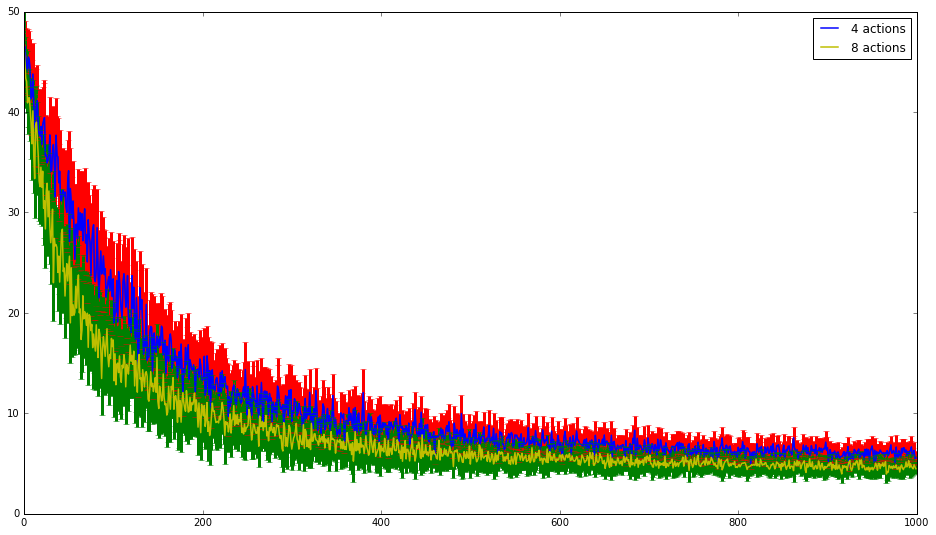

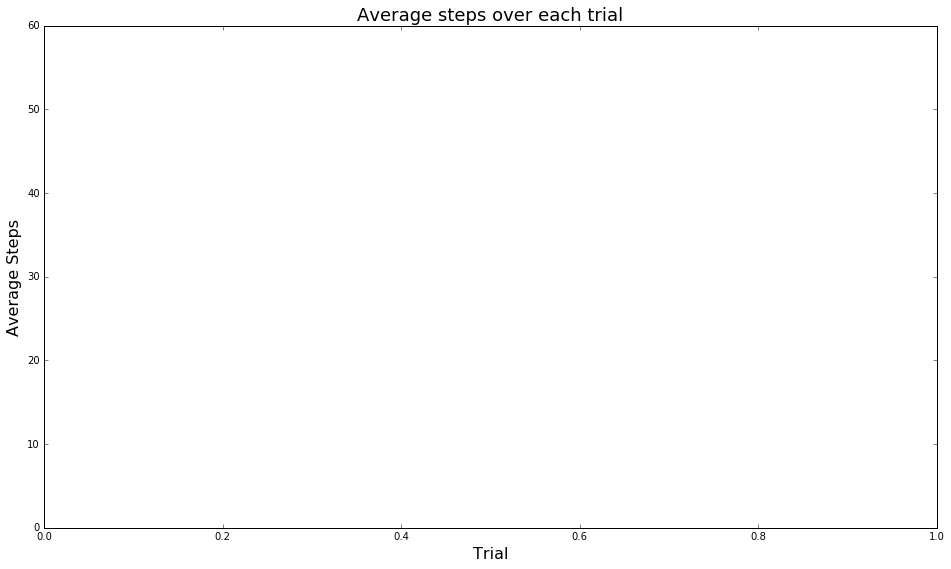

In [8]:
import matplotlib.pyplot as plt
#%matplotlib inline

n_trials = 1000
eps = 0.01
gamma = 0.9                                 #curve full down very quickly when applying high gamma 
learning_rate = 0.15
repetitions = 100


total_8 = np.zeros((repetitions,n_trials))
for i in range(repetitions):
    total_8[i,:] =  homing_nn_q4_8(n_trials,learning_rate,eps,gamma)

means_8 = np.mean(total_8,axis=0)
errors_8 = 2 * np.std(total_8, axis = 0) / np.sqrt(repetitions)

total_4=np.zeros((repetitions,n_trials))
for i in range(repetitions):
    total_4[i,:] =  homing_nn_q4_4(n_trials,learning_rate,eps,gamma)

means_4 = np.mean(total_4,axis=0)
errors_4 = 2 * np.std(total_4, axis = 0) / np.sqrt(repetitions)






fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

plt.subplot(111)
plt.figure(figsize=(16,9))
plt.title('Average steps over each trial',fontsize=18)
plt.xlabel('Trial',fontsize = 16)
plt.ylabel('Average Steps',fontsize = 16)
plt.ylim([0,60])

ax.errorbar(np.arange(n_trials),means_4, errors_4, 0, fmt='-',ecolor='r', elinewidth = 3)
ln1=ax.plot(np.arange(n_trials),means_4,'b',linewidth = 1.5, label='4 actions')
ax.errorbar(np.arange(n_trials),means_8, errors_4, fmt='-',ecolor='g',elinewidth = 3)
ln2=ax.plot(np.arange(n_trials),means_8,'y',linewidth = 1.5, label='8 actions')

ln=ln1+ln2
labs=[i.get_label() for i in ln]
ax.legend(ln,labs)


plt.show()